In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ---- State mapping ----
state_map = {
    1:"Alabama", 2:"Alaska", 4:"Arizona", 5:"Arkansas", 6:"California",
    8:"Colorado", 9:"Connecticut", 10:"Delaware", 11:"District of Columbia",
    12:"Florida", 13:"Georgia", 15:"Hawaii", 16:"Idaho", 17:"Illinois",
    18:"Indiana", 19:"Iowa", 20:"Kansas", 21:"Kentucky", 22:"Louisiana",
    23:"Maine", 24:"Maryland", 25:"Massachusetts", 26:"Michigan", 27:"Minnesota",
    28:"Mississippi", 29:"Missouri", 30:"Montana", 31:"Nebraska", 32:"Nevada",
    33:"New Hampshire", 34:"New Jersey", 35:"New Mexico", 36:"New York",
    37:"North Carolina", 38:"North Dakota", 39:"Ohio", 40:"Oklahoma",
    41:"Oregon", 42:"Pennsylvania", 44:"Rhode Island", 45:"South Carolina",
    46:"South Dakota", 47:"Tennessee", 48:"Texas", 49:"Utah", 50:"Vermont",
    51:"Virginia", 53:"Washington", 54:"West Virginia", 55:"Wisconsin", 56:"Wyoming"
}

In [3]:
# ---- Load and prepare microdata ----
print("LOADING AND CLEANING MICRODATA")

df = pd.read_csv("ipums_cps_2000_2010.csv")

print(f"\nRaw data loaded:")
print(f"  Total observations: {len(df):,}")
print(f"  Columns: {df.shape[1]}")
print(f"  Years: {df['YEAR'].min()}-{df['YEAR'].max()}")


LOADING AND CLEANING MICRODATA

Raw data loaded:
  Total observations: 17,894,047
  Columns: 19
  Years: 2000-2010


In [4]:
# Map state names
df["state"] = df["STATEFIP"].map(state_map)

# ---- Filter to women ages 25-54 ----
print(f"\nFiltering to women ages 25-54...")
print(f"  Before filtering: {len(df):,} observations")

df = df[(df["AGE"] >= 25) & (df["AGE"] <= 54) & (df["SEX"] == 2)]

print(f"  After filtering: {len(df):,} observations")



Filtering to women ages 25-54...
  Before filtering: 17,894,047 observations
  After filtering: 3,899,679 observations


In [5]:
df = df[(df["AGE"].between(25, 54)) & (df["SEX"] == 2)].copy()

print(f"  After filtering: {len(df):,} observations")
print(f"  Reduction: {len(df):,} obs kept ({100*len(df)/len(df):.1f}%)")

  After filtering: 3,899,679 observations
  Reduction: 3,899,679 obs kept (100.0%)


In [6]:
# ---- Create labor force indicator ----
# LABFORCE coding in IPUMS CPS:
#   0 = NIU (Not in Universe - children)
#   1 = Not in labor force
#   2 = In labor force
df["in_lf"] = (df["LABFORCE"] == 2).astype(int)

print(f"\nLabor force participation:")
print(f"  In labor force: {df['in_lf'].sum():,} ({100*df['in_lf'].mean():.2f}%)")
print(f"  Not in LF: {(1-df['in_lf']).sum():,} ({100*(1-df['in_lf'].mean()):.2f}%)")


Labor force participation:
  In labor force: 2,995,427 (76.81%)
  Not in LF: 904,252 (23.19%)


In [7]:
# ---- Create education indicator ----
# EDUC coding in IPUMS CPS (key values):
#   2-72 = Less than HS
#   73 = HS diploma
#   81-91 = Some college
#   111 = Bachelor's degree
#   123-125 = Graduate degree
# We'll use 111+ as "college degree"

df["college"] = (df["EDUC"] >= 111).astype(int)

print(f"\nEducation (college degree):")
print(f"  College degree: {df['college'].sum():,} ({100*df['college'].mean():.2f}%)")
print(f"  No college degree: {(1-df['college']).sum():,} ({100*(1-df['college'].mean()):.2f}%)")


Education (college degree):
  College degree: 1,224,079 (31.39%)
  No college degree: 2,675,600 (68.61%)


In [8]:
# ---- Create marriage indicator ----
# MARST coding:
#   1 = Married, spouse present
#   2 = Married, spouse absent
#   3 = Separated
#   4 = Divorced
#   5 = Widowed
#   6 = Never married

df["married"] = df["MARST"].isin([1, 2]).astype(int)

print(f"\nMarital status:")
print(f"  Married: {df['married'].sum():,} ({100*df['married'].mean():.2f}%)")
print(f"  Not married: {(1-df['married']).sum():,} ({100*(1-df['married'].mean()):.2f}%)")


Marital status:
  Married: 2,494,622 (63.97%)
  Not married: 1,405,057 (36.03%)


In [9]:
# ---- Check for missing values ----
print(f"\nMissing values:")
missing = df[['YEAR', 'state', 'AGE', 'in_lf', 'college', 'married', 'WTFINL']].isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "  No missing values in key variables ✓")


Missing values:
  No missing values in key variables ✓


In [10]:
# ---- Summary of individual-level data ----
print("INDIVIDUAL-LEVEL SUMMARY STATISTICS")

summary_individual = pd.DataFrame({
    'Variable': [
        'Age (years)',
        'In labor force (%)',
        'College degree (%)',
        'Married (%)',
        'Survey weight'
    ],
    'Mean': [
        df['AGE'].mean(),
        100 * df['in_lf'].mean(),
        100 * df['college'].mean(),
        100 * df['married'].mean(),
        df['WTFINL'].mean()
    ],
    'Std Dev': [
        df['AGE'].std(),
        100 * df['in_lf'].std(),
        100 * df['college'].std(),
        100 * df['married'].std(),
        df['WTFINL'].std()
    ],   'Min': [
        df['AGE'].min(),
        100 * df['in_lf'].min(),
        100 * df['college'].min(),
        100 * df['married'].min(),
        df['WTFINL'].min()
    ],
    'Max': [
        df['AGE'].max(),
        100 * df['in_lf'].max(),
        100 * df['college'].max(),
        100 * df['married'].max(),
        df['WTFINL'].max()
    ],
    'N': [
        df['AGE'].notna().sum(),
        df['in_lf'].notna().sum(),
        df['college'].notna().sum(),
        df['married'].notna().sum(),
        df['WTFINL'].notna().sum()
    ]
})

print("\n")
print(summary_individual.to_string(index=False))

INDIVIDUAL-LEVEL SUMMARY STATISTICS


          Variable        Mean     Std Dev  Min       Max       N
       Age (years)   40.024117    8.464424 25.0    54.000 3899679
In labor force (%)   76.812143   42.203193  0.0   100.000 3899679
College degree (%)   31.389225   46.407323  0.0   100.000 3899679
       Married (%)   63.969932   48.008766  0.0   100.000 3899679
     Survey weight 2126.236020 1144.069221  0.0 21190.805 3899679


In [13]:
# ---- Aggregate to state-year level ----
print("AGGREGATING TO STATE-YEAR LEVEL")

agg = (
    # Use group_keys=False so the group labels are not included as extra levels passed to the function
    df.groupby(["YEAR", "state"], group_keys=False)
    .apply(lambda x: pd.Series({
        "flfp": np.average(x["in_lf"], weights=x["WTFINL"]),
        "college_share": np.average(x["college"], weights=x["WTFINL"]),
        "married_share": np.average(x["married"], weights=x["WTFINL"]),
        "mean_age": np.average(x["AGE"], weights=x["WTFINL"]),
        "n_observations": len(x),
        "sum_weights": x["WTFINL"].sum()
    }))
    .reset_index()
)  # Convert to percentages for readability
agg["flfp_pct"] = agg["flfp"] * 100
agg["college_pct"] = agg["college_share"] * 100
agg["married_pct"] = agg["married_share"] * 100

print(f"\nAggregated dataset created:")
print(f"  Total state-year cells: {len(agg)}")
print(f"  States: {agg['state'].nunique()}")
print(f"  Years: {agg['YEAR'].nunique()} ({agg['YEAR'].min()}-{agg['YEAR'].max()})")
print(f"  Expected cells: {agg['state'].nunique()} states × {agg['YEAR'].nunique()} years = {agg['state'].nunique() * agg['YEAR'].nunique()}")


AGGREGATING TO STATE-YEAR LEVEL

Aggregated dataset created:
  Total state-year cells: 561
  States: 51
  Years: 11 (2000-2010)
  Expected cells: 51 states × 11 years = 561

Aggregated dataset created:
  Total state-year cells: 561
  States: 51
  Years: 11 (2000-2010)
  Expected cells: 51 states × 11 years = 561


In [14]:
# Check for missing state-years
expected_cells = agg['state'].nunique() * agg['YEAR'].nunique()
actual_cells = len(agg)
if actual_cells < expected_cells:
    print(f"  ⚠ WARNING: Missing {expected_cells - actual_cells} state-year cells!")

In [15]:
# ---- STATE-YEAR LEVEL SUMMARY ----
print("STATE-YEAR LEVEL SUMMARY STATISTICS")

summary_agg = pd.DataFrame({
    'Variable': [
        'Female LFP Rate (%)',
        'College Degree (%)',
        'Married (%)',
        'Mean Age (years)',
        'Sample Size (unweighted)',
        'Sum of Weights'
    ],
    'Mean': [
        agg['flfp_pct'].mean(),
        agg['college_pct'].mean(),
        agg['married_pct'].mean(),
        agg['mean_age'].mean(),
        agg['n_observations'].mean(),
        agg['sum_weights'].mean()
    ],
    'Std Dev': [
        agg['flfp_pct'].std(),
        agg['college_pct'].std(),
        agg['married_pct'].std(),
        agg['mean_age'].std(),
        agg['n_observations'].std(),
        agg['sum_weights'].std()
    ],
    'Min': [
        agg['flfp_pct'].min(),
        agg['college_pct'].min(),
        agg['married_pct'].min(),
        agg['mean_age'].min(),
        agg['n_observations'].min(),
        agg['sum_weights'].min()
    ],
    'Max': [
        agg['flfp_pct'].max(),
        agg['college_pct'].max(),
        agg['married_pct'].max(),
        agg['mean_age'].max(),
        agg['n_observations'].max(),
        agg['sum_weights'].max()
    ]
})

print("\n")
print(summary_agg.to_string(index=False))

STATE-YEAR LEVEL SUMMARY STATISTICS


                Variable         Mean      Std Dev          Min          Max
     Female LFP Rate (%) 7.742438e+01 4.265320e+00 6.398187e+01 8.799282e+01
      College Degree (%) 3.088484e+01 6.354991e+00 1.865096e+01 5.990431e+01
             Married (%) 6.389345e+01 6.008869e+00 2.975385e+01 7.526917e+01
        Mean Age (years) 3.981866e+01 5.521946e-01 3.708621e+01 4.114325e+01
Sample Size (unweighted) 6.951299e+03 4.445979e+03 2.688000e+03 3.036000e+04
          Sum of Weights 1.478010e+07 1.656077e+07 1.219697e+06 9.456050e+07


In [16]:
# ---- CALIFORNIA-SPECIFIC SUMMARY ----
print("CALIFORNIA vs OTHER STATES COMPARISON")

ca_summary = agg[agg['state'] == 'California'][['flfp_pct', 'college_pct', 'married_pct', 'mean_age']].mean()
other_summary = agg[agg['state'] != 'California'][['flfp_pct', 'college_pct', 'married_pct', 'mean_age']].mean()

comparison = pd.DataFrame({
    'Variable': ['FLFP Rate (%)', 'College Degree (%)', 'Married (%)', 'Mean Age (years)'],
    'California': [
        ca_summary['flfp_pct'],
        ca_summary['college_pct'],
        ca_summary['married_pct'],
        ca_summary['mean_age']
    ],
    'Other States': [
        other_summary['flfp_pct'],
        other_summary['college_pct'],
        other_summary['married_pct'],
        other_summary['mean_age']
    ],
    'Difference': [
        ca_summary['flfp_pct'] - other_summary['flfp_pct'],
        ca_summary['college_pct'] - other_summary['college_pct'],
        ca_summary['married_pct'] - other_summary['married_pct'],
        ca_summary['mean_age'] - other_summary['mean_age']
    ]
})

print("\n")
print(comparison.to_string(index=False))

print("\nInterpretation:")
if comparison.loc[comparison['Variable'] == 'FLFP Rate (%)', 'Difference'].values[0] > 0:
    print("  → California has HIGHER labor force participation than average")
else:
    print("  → California has LOWER labor force participation than average")

if comparison.loc[comparison['Variable'] == 'College Degree (%)', 'Difference'].values[0] > 2:
    print("  → California is significantly MORE educated (important for matching!)")

if abs(comparison.loc[comparison['Variable'] == 'Married (%)', 'Difference'].values[0]) > 5:
    print("  → California has notably different marriage patterns")

CALIFORNIA vs OTHER STATES COMPARISON


          Variable  California  Other States  Difference
     FLFP Rate (%)   72.148779     77.529890   -5.381111
College Degree (%)   31.893015     30.864681    1.028334
       Married (%)   62.179013     63.927735   -1.748722
  Mean Age (years)   39.357082     39.827896   -0.470814

Interpretation:
  → California has LOWER labor force participation than average


In [17]:
# ---- DATA QUALITY CHECKS ----
print("DATA QUALITY CHECKS")

print("\n1. Sample Size Distribution Across States:")
sample_sizes = agg.groupby('state')['n_observations'].mean().sort_values(ascending=False)
print(f"\n   Largest states (avg obs per year):")
print(sample_sizes.head(5))
print(f"\n   Smallest states (avg obs per year):")
print(sample_sizes.tail(5))

if sample_sizes.min() < 500:
    print(f"\n   ⚠ WARNING: Some states have very small samples (<500 obs/year)")
    print(f"   → May want to consider dropping these states or using multi-year averages")

print("\n2. Time Coverage:")
years_by_state = agg.groupby('state')['YEAR'].nunique()
if years_by_state.min() < 11:
    missing_years = years_by_state[years_by_state < 11]
    print(f"   ⚠ WARNING: Some states missing years:")
    print(missing_years)
else:
    print("   ✓ All states have complete time coverage (2000-2010)")

print("\n3. Extreme Values:")
# Check for implausible FLFP rates
if (agg['flfp_pct'] < 40).any():
    print(f"   ⚠ Some state-years have FLFP < 40%:")
    print(agg[agg['flfp_pct'] < 40][['YEAR', 'state', 'flfp_pct']])

if (agg['flfp_pct'] > 90).any():
    print(f"   ⚠ Some state-years have FLFP > 90%:")
    print(agg[agg['flfp_pct'] > 90][['YEAR', 'state', 'flfp_pct']])

if not ((agg['flfp_pct'] < 40).any() or (agg['flfp_pct'] > 90).any()):
    print("   ✓ All FLFP rates are plausible (40-90%)")

DATA QUALITY CHECKS

1. Sample Size Distribution Across States:

   Largest states (avg obs per year):
state
California    28576.909091
Texas         17198.454545
New York      17095.909091
Florida       14453.454545
Illinois      12071.272727
Name: n_observations, dtype: float64

   Smallest states (avg obs per year):
state
Arkansas       3822.818182
Louisiana      3684.090909
New Mexico     3663.636364
Montana        3535.636364
Mississippi    3467.545455
Name: n_observations, dtype: float64

2. Time Coverage:
   ✓ All states have complete time coverage (2000-2010)

3. Extreme Values:
   ✓ All FLFP rates are plausible (40-90%)


In [18]:
# ---- TREATMENT STATUS ----
print("TREATMENT DEFINITION")

# Define treatment
agg['treated'] = ((agg['state'] == 'California') & (agg['YEAR'] >= 2004)).astype(int)

# For July 2004 implementation, more precisely:
# If you have MONTH variable, you could do:
# agg['treated'] = ((agg['state'] == 'California') & 
#                   ((agg['YEAR'] > 2004) | ((agg['YEAR'] == 2004) & (agg['MONTH'] >= 7)))).astype(int)

print("\nTreatment cells:")
print(f"  Control (CA pre-2004): {((agg['state'] == 'California') & (agg['YEAR'] < 2004)).sum()} observations")
print(f"  Treated (CA 2004+): {agg['treated'].sum()} observations")
print(f"  Never-treated (other states): {((agg['state'] != 'California')).sum()} observations")

print("\n" + "="*70)
print("SAVE AGGREGATED DATA")
print("="*70)

agg.to_csv("state_year_predictors.csv", index=False)
print("\n✓ File saved: state_year_predictors.csv")
print(f"  Dimensions: {agg.shape[0]} rows × {agg.shape[1]} columns")
print(f"  Variables: {', '.join(agg.columns)}")

TREATMENT DEFINITION

Treatment cells:
  Control (CA pre-2004): 4 observations
  Treated (CA 2004+): 7 observations
  Never-treated (other states): 550 observations

SAVE AGGREGATED DATA

✓ File saved: state_year_predictors.csv
  Dimensions: 561 rows × 12 columns
  Variables: YEAR, state, flfp, college_share, married_share, mean_age, n_observations, sum_weights, flfp_pct, college_pct, married_pct, treated


SUMMARY VISUALIZATIONS

✓ Plots saved: summary_statistics_plots.png

✓ Plots saved: summary_statistics_plots.png


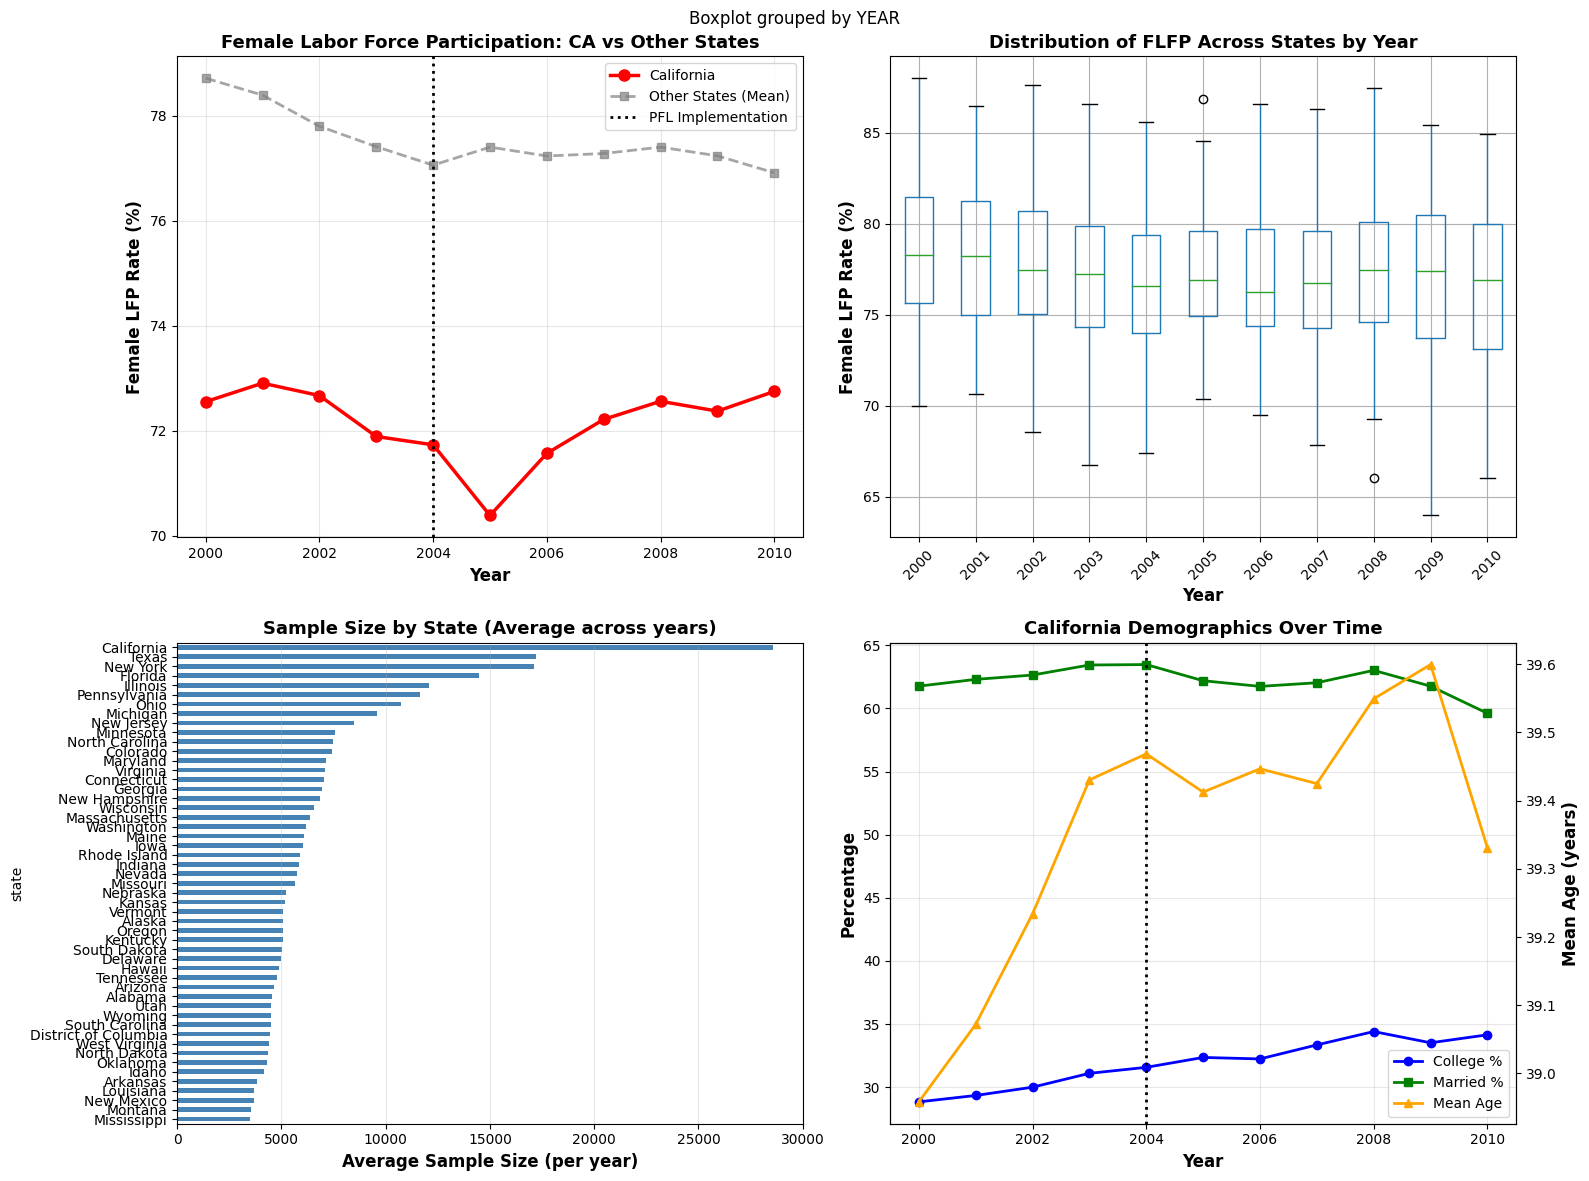

In [20]:

# ---- VISUALIZATIONS ----
print("SUMMARY VISUALIZATIONS")

# Plot 1: FLFP over time for California vs others
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Panel 1: FLFP trends
ax = axes[0, 0]
ca_data = agg[agg['state'] == 'California'].sort_values('YEAR')
other_mean = agg[agg['state'] != 'California'].groupby('YEAR')['flfp_pct'].mean().reset_index()

ax.plot(ca_data['YEAR'], ca_data['flfp_pct'], 'o-', linewidth=2.5, 
        markersize=8, label='California', color='red')
ax.plot(other_mean['YEAR'], other_mean['flfp_pct'], 's--', linewidth=2, 
        markersize=6, label='Other States (Mean)', color='gray', alpha=0.7)
ax.axvline(2004, color='black', linestyle=':', linewidth=2, label='PFL Implementation')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Female LFP Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Female Labor Force Participation: CA vs Other States', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

# Panel 2: Distribution of FLFP across states
ax = axes[0, 1]
agg.boxplot(column='flfp_pct', by='YEAR', ax=ax)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Female LFP Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Distribution of FLFP Across States by Year', fontsize=13, fontweight='bold')
plt.sca(ax)
plt.xticks(rotation=45)

# Panel 3: Sample sizes by state
ax = axes[1, 0]
sample_sizes_plot = agg.groupby('state')['n_observations'].mean().sort_values(ascending=True)
sample_sizes_plot.plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Average Sample Size (per year)', fontsize=12, fontweight='bold')
ax.set_title('Sample Size by State (Average across years)', fontsize=13, fontweight='bold')
ax.grid(alpha=0.3, axis='x')

# Panel 4: California characteristics over time
ax = axes[1, 1]
ca_data_full = agg[agg['state'] == 'California'].sort_values('YEAR')
ax2 = ax.twinx()

ax.plot(ca_data_full['YEAR'], ca_data_full['college_pct'], 'o-', 
        linewidth=2, label='College %', color='blue')
ax.plot(ca_data_full['YEAR'], ca_data_full['married_pct'], 's-', 
        linewidth=2, label='Married %', color='green')
ax2.plot(ca_data_full['YEAR'], ca_data_full['mean_age'], '^-', 
         linewidth=2, label='Mean Age', color='orange')

ax.axvline(2004, color='black', linestyle=':', linewidth=2)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Age (years)', fontsize=12, fontweight='bold')
ax.set_title('California Demographics Over Time', fontsize=13, fontweight='bold')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, fontsize=10, loc='best')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('summary_statistics_plots.png', dpi=300, bbox_inches='tight')
print("\n✓ Plots saved: summary_statistics_plots.png")
plt.show()
